In [1]:
import os,sys
import math

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
sys.path.append("../../src")  # adjust path as needed
from data_loader import LoadData
from model import MlModels
from evaluation import Evaluate

### MRI and Demographic Data

### Load the Data

In [2]:
# --- Load data
mri_data_path = "/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/clean_data/PDMRI_Clean_Merged_6_13_25.csv"
gene_data_path = "/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/clean_data/gene_expression_summary.csv"
nhy_latest_path = "/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/clean_data/clean_mds_updrs_v1.csv"

dataload_mri_cls = LoadData(input_updrs=nhy_latest_path,
    input_gene_clinical=gene_data_path,
    input_mri=mri_data_path,
    mri_data=True,
    gene_data=False,
    group_NHY=True,
    common_dataset=True,
    stratify_splits=True)

X_data, Y_data = dataload_mri_cls.merged_data()

X shape: (712, 110), Y shape: (712, 1)
Y class distribution: {(1.0,): 328, (0.0,): 277, (2.0,): 107}
['rh_MeanThickness', 'rh_WhiteSurfArea', 'Left_Cerebellum_White_Matter', 'Right_Cerebellum_White_Matter', 'CerebralWhiteMatterVol', 'rhSurfaceHoles', 'lhSurfaceHoles']


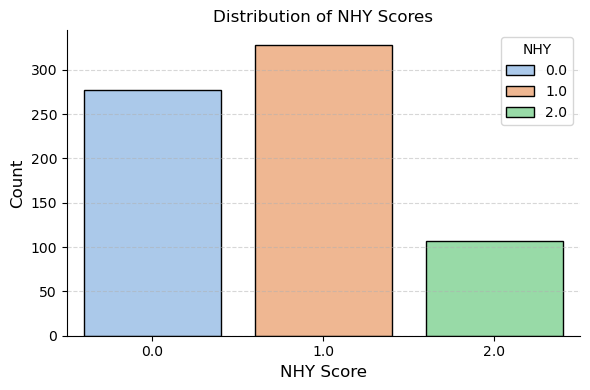

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(x='NHY', data=Y_data, hue='NHY', palette='pastel', edgecolor='black')
plt.title("Distribution of NHY Scores", fontsize=12)
plt.xlabel("NHY Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

### Split the data

In [4]:
X_train, Y_train, X_cv, Y_cv, X_test, Y_test = dataload_mri_cls.data_split(X_data, Y_data)
data = {}
data['X_train'] = X_train
data['Y_train'] = Y_train

### Logistic Regression model

In [5]:

data0 = Y_train[Y_train == 0]
data1 = Y_train[Y_train == 1]
data2 = Y_train[Y_train == 2]

w0 = len(data0)/ (len(data0) + len(data1) + len(data2))
w1 = len(data1)/ (len(data0) + len(data1) + len(data2))
w2 = len(data2)/ (len(data0) + len(data1) + len(data2))

class_weights = {0: w0, 1: w1, 2: w2}

params_xgb = {
    'max_depth': 5,
    'n_estimators': 800,
    'objective': 'multi:softprob',
    'num_class': 3,
    'reg_alpha': 0.5,   # L1
    'reg_lambda': 1.0,   # L2
    'learning_rate': 0.2,
    'subsample': 0.5
}

my_model_boost = MlModels(
    model_name='xgboost',
    data=data,
    params=params_xgb,
    pca_flag=False
)

model_boost_train = my_model_boost.build_model()


In [6]:
eval_objs = Evaluate(my_model_boost, X_cv, Y_cv)
eval_results = eval_objs.report_validation_metrics()


✅ Validation Accuracy: 0.4767

📋 Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0.0          │       0.444 │    0.485 │      0.464 │    33     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1.0          │       0.585 │    0.6   │      0.593 │    40     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 2.0          │       0.111 │    0.077 │      0.091 │    13     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │       0.477 │    0.477 │      0.477 │     0.477 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │       0.38  │    0.387 │      0.382 │    86     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │       0.46  │    0.477 │      0.467 │    86     │
╘════

### Demographic, Gene Expressions and MRI

Grid Search Params: 

Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 1.0, 'reg_lambda': 2.0, 'subsample': 0.5}
Best Accuracy: 0.5196687370600414


In [7]:
# --- Load data
mri_data_path = "/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/clean_data/PDMRI_Clean_Merged_6_13_25.csv"
gene_data_path = "/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/clean_data/gene_expression_summary.csv"
nhy_latest_path = "/Users/pushpita/Documents/Erdos_bootcamp/our_project/Data/clean_data/clean_mds_updrs.csv"

dataload_all_cls = LoadData(input_updrs=nhy_latest_path,
    input_gene_clinical=gene_data_path,
    input_mri=mri_data_path,
    mri_data=True,
    gene_data=True,
    group_NHY=True,
    common_dataset=True,
    stratify_splits=True)

X_data, Y_data = dataload_all_cls.merged_data()

X shape: (712, 110), Y shape: (712, 1)
Y class distribution: {(1.0,): 327, (0.0,): 278, (2.0,): 107}


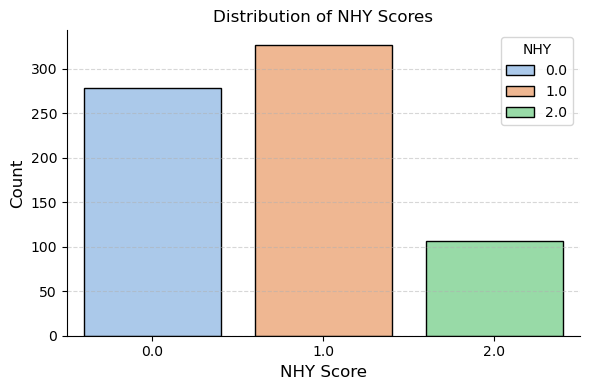

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='NHY', data=Y_data, hue='NHY', palette='pastel', edgecolor='black')
plt.title("Distribution of NHY Scores", fontsize=12)
plt.xlabel("NHY Score", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.despine()
plt.tight_layout()
plt.show()

In [9]:
X_train, Y_train, X_cv, Y_cv, X_test, Y_test = dataload_all_cls.data_split(X_data, Y_data)
data_all = {}
data_all['X_train'] = X_train
data_all['Y_train'] = Y_train

### Model 1

In [10]:
data0 = Y_train[Y_train == 0]
data1 = Y_train[Y_train == 1]
data2 = Y_train[Y_train == 2]

w0 = len(data0)/ (len(data0) + len(data1) + len(data2))
w1 = len(data1)/ (len(data0) + len(data1) + len(data2))
w2 = len(data2)/ (len(data0) + len(data1) + len(data2))

# class_weights = {0: w0, 1: w1, 2: w2}

total = len(data0) + len(data1) + len(data2)
n_classes = 3
class_weights = {
    0: total / (n_classes * len(data0)),
    1: total / (n_classes * len(data1)),
    2: total / (n_classes * len(data2)),
}

params_xgb = {
    'max_depth': 4,
    'n_estimators': 800,
    'objective': 'multi:softprob',
    'num_class': 3,
    'reg_alpha': 2.4,   # L1
    'reg_lambda': 1.5,   # L2
    'learning_rate': 0.03,
    'subsample': 0.3
}

my_model_boost_alldata = MlModels(
    model_name='xgboost',
    data=data_all,
    params=params_xgb,
    pca_flag=True,
    pca_components=70,
    sample_weight=True,
    boost_class_weights=class_weights,
)

model_boost_train_alldata = my_model_boost_alldata.build_model()

eval_objs_alldata = Evaluate(my_model_boost_alldata, X_cv, Y_cv)
eval_results_alldata = eval_objs_alldata.report_validation_metrics()


✅ Validation Accuracy: 0.4884

📋 Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0.0          │       0.471 │    0.471 │      0.471 │    34     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1.0          │       0.523 │    0.59  │      0.554 │    39     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 2.0          │       0.375 │    0.231 │      0.286 │    13     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │       0.488 │    0.488 │      0.488 │     0.488 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │       0.456 │    0.43  │      0.437 │    86     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │       0.48  │    0.488 │      0.481 │    86     │
╘════

##### Model 1 [Test Set]

In [11]:
eval_objs_alldata = Evaluate(my_model_boost_alldata, X_test, Y_test)
eval_results_alldata = eval_objs_alldata.report_validation_metrics()


✅ Validation Accuracy: 0.4196

📋 Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0.0          │       0.429 │    0.482 │      0.454 │     56    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1.0          │       0.534 │    0.47  │      0.5   │     66    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 2.0          │       0.091 │    0.095 │      0.093 │     21    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │       0.42  │    0.42  │      0.42  │      0.42 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │       0.351 │    0.349 │      0.349 │    143    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │       0.428 │    0.42  │      0.422 │    143    │
╘════

### Model 2 [Best]

In [12]:
n_classes = 3
boost_class_weights = {
    0: 1.0,
    1: 1.0,
    2: 2.0
}

params_xgb = {
    'max_depth': 3,
    'n_estimators': 800,
    'objective': 'multi:softprob',
    'num_class': 3,
    'reg_alpha': 2.4,   # L1
    'reg_lambda': 1.5,   # L2
    'learning_rate': 0.06,
    'subsample': 0.4
}

my_model_boost_alldata = MlModels(
    model_name='xgboost',
    data=data_all,
    params=params_xgb,
    pca_flag=True,
    pca_components=70,
    sample_weight=True,
    boost_class_weights=boost_class_weights,
)

model_boost_train_alldata = my_model_boost_alldata.build_model()

eval_objs_alldata = Evaluate(my_model_boost_alldata, X_cv, Y_cv)
eval_results_alldata = eval_objs_alldata.report_validation_metrics()


✅ Validation Accuracy: 0.5000

📋 Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0.0          │       0.486 │    0.5   │      0.493 │      34   │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1.0          │       0.5   │    0.615 │      0.552 │      39   │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 2.0          │       0.667 │    0.154 │      0.25  │      13   │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │       0.5   │    0.5   │      0.5   │       0.5 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │       0.551 │    0.423 │      0.431 │      86   │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │       0.52  │    0.5   │      0.483 │      86   │
╘════

### Final Model

In [14]:
eval_objs_alldata = Evaluate(my_model_boost_alldata, X_test, Y_test)
eval_results_alldata = eval_objs_alldata.report_validation_metrics()


✅ Validation Accuracy: 0.4685

📋 Classification Report:
╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│              │   precision │   recall │   f1-score │   support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ 0.0          │       0.5   │    0.518 │      0.509 │    56     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 1.0          │       0.556 │    0.53  │      0.543 │    66     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ 2.0          │       0.136 │    0.143 │      0.14  │    21     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ accuracy     │       0.469 │    0.469 │      0.469 │     0.469 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │       0.397 │    0.397 │      0.397 │   143     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │       0.472 │    0.469 │      0.47  │   143     │
╘════